# 1.

In [43]:
import numpy as np
import pandas as pd
data = pd.read_csv('colors.txt', delimiter=' ', header=None)
train = data.iloc[:,0]
result = data.iloc[:,-1]
result_bool = np.where(result == 'red',1,0)

In [63]:
def logistics(beta_0, beta_1,x):
    z = beta_0 + beta_1 * x
    return 1 / (1 + np.exp(-z))
def loss(beta_0, beta_1, x, y):
    m = len(y)
    loss = - y * np.log(logistics(beta_0, beta_1,  x)) - (1 - y) * np.log(1-logistics(beta_0, beta_1, x))
    tot_loss = 1/m * np.sum(loss)
    return tot_loss

def minimize_loss(x,y, max_iter=1000, learning_rate=0.01):
    beta = np.array([0.0, 0.0])
    loss_old = loss(beta[0], beta[1], x, y)
    
    for i in range(max_iter):
        steps = np.random.normal(loc=0.0, scale=learning_rate, size=2)
        beta_new = beta + steps
        loss_new = loss(beta_new[0], beta_new[1], x, y)
        if loss_new < loss_old:
            beta = beta_new
            loss_old = loss_new
        else:
            #print(f"{i}th iteration: proposing next beta")
            continue
    return beta, loss_old

    

In [65]:
train = data.sample(frac=0.8, random_state=1)
test = data.drop(train.index)
train_x = train.iloc[:,0]
train_result = train.iloc[:,-1]
train_y = np.where(train_result == 'red',1,0)
test_x = test.iloc[:,0]
test_result = test.iloc[:,-1]
test_y = np.where(test_result == 'red',1,0)

beta,_ = minimize_loss(train_x, train_y, learning_rate=0.1)
logistics(beta[0], beta[1], test_x)

1     0.000393
5     0.996588
6     0.053471
9     0.986536
11    0.007116
12    0.855885
16    0.999656
18    0.061929
20    0.975645
25    0.000058
28    0.999780
37    0.017587
50    0.735341
64    0.982049
71    0.991521
72    0.005641
75    0.000157
76    0.999407
79    0.000460
Name: 0, dtype: float64

In [66]:
test_y

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0])

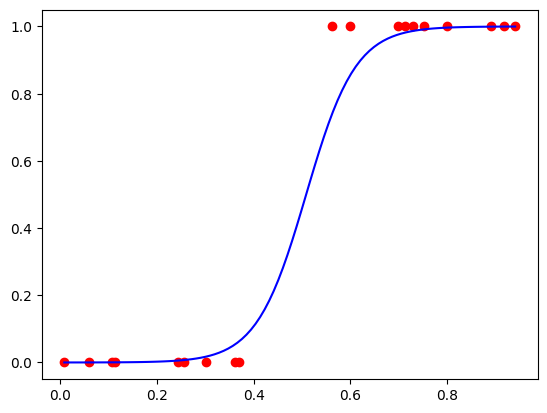

In [67]:
import matplotlib.pyplot as plt
plt.scatter(test_x, test_y, color='red')
xarr = np.linspace(min(test_x), max(test_x), 100)
plt.plot(xarr, logistics(beta[0], beta[1], xarr), color='blue')

# 2

In [140]:
def logistics_2(data,  beta):
    x1  = data[:,0]; x2 = data[:,1]
    beta1=beta[0]; beta2=beta[1]; beta3=beta[2]
    z = beta1 + beta2 * x1 + beta3 * x2
    return 1 / (1 + np.exp(-z))
def loss(data, y, beta):
    x1  = data[:,0]; x2 = data[:,1]
    m = len(y)
    loss = - y * np.log(logistics_2(data, beta)) - (1 - y) * np.log(1-logistics_2(data, beta))
    tot_loss = 1/m * np.sum(loss)
    return tot_loss

def minimize_loss(data, y, max_iter=1000, learning_rate=0.01):
    beta = np.array([0.0, 0.0, 0.0])
    loss_old = loss(data, y, beta)
    
    for i in range(max_iter):
        steps = np.random.normal(loc=0.0, scale=learning_rate, size=3)
        beta_new = beta + steps
        loss_new = loss(data, y, beta_new)
        if loss_new < loss_old:
            beta = beta_new
            loss_old = loss_new
        else:
            #print(f"{i}th iteration: proposing next beta")
            continue
    return beta, loss_old

In [148]:
galaxy  = pd.read_csv('Galaxies.csv', delimiter=',', header=None)
HII = pd.read_csv('HIIregions.csv', delimiter=',', header=None)
galaxy = pd.concat([galaxy, pd.Series(np.zeros(galaxy.shape[0]))], axis=1)
HII = pd.concat([HII, pd.Series(np.ones(HII.shape[0]))], axis=1)

In [149]:
HII

,0,1,0
0,0.007071,6.287470,1.0
1,0.009131,6.387551,1.0
2,0.013193,8.268598,1.0
3,0.016816,6.982459,1.0
4,0.019393,6.509182,1.0
...,...,...,...
109,0.281165,0.047722,1.0
110,0.265650,0.047032,1.0
111,0.269713,0.040229,1.0
112,0.220873,0.045662,1.0


In [150]:
train_gal = galaxy.sample(frac=0.8, random_state=42)
test_gal = galaxy.drop(train_gal.index)
train_HII = HII.sample(frac=0.8, random_state=42)
test_HII = HII.drop(train_HII.index)
train_data = pd.concat([train_gal, train_HII], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
test_data = pd.concat([test_gal, test_HII], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
train_x = train_data.iloc[:,:-1].to_numpy(dtype=float)
train_y = train_data.iloc[:,-1].to_numpy(dtype=float)
test_x = test_data.iloc[:,:-1].to_numpy(dtype=float)
test_y = test_data.iloc[:,-1].to_numpy(dtype=float)

In [155]:
beta, _ = minimize_loss(train_x, train_y, learning_rate=0.1)
predictions = logistics_2(test_x, beta)

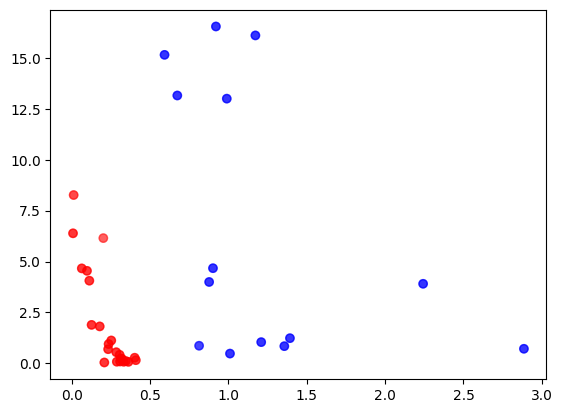

In [162]:
plt.scatter(test_x[:,0], test_x[:,1], c=predictions, cmap='bwr', alpha=0.7)
plt.scatter(test_x[:,0], test_x[:,1], c=test_y, cmap='bwr', alpha=0.3)

# 3.

In [ ]:
data = pd.read_csv('three_colors.txt', delimiter=' ', header=None)
data_blue = np.where(data.iloc[:,-1] == 'blue',1,0)
data_green = np.where(data.iloc[:,-1] == 'green',1,0)
data_color = np.zeros(data.shape[0]) + data_green + 2*data_blue # red : 0, green : 1, blue : 2

array([0., 1., 1., 0., 1., 2., 2., 1., 0., 1., 1., 0., 2., 2., 1., 1., 2.,
       1., 1., 1., 2., 1., 0., 1., 2., 2., 2., 1., 2., 0., 2., 1., 1., 0.,
       2., 1., 2., 0., 1., 0., 0., 0., 0., 1., 1., 2., 0., 1., 2., 2., 1.,
       0., 1., 2., 1., 0., 2., 0., 0., 1., 0., 2., 2., 1., 1., 1., 2., 2.,
       1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 0., 0., 2., 1., 1., 1.,
       0., 2., 2., 0., 1., 0., 2., 2., 1., 1., 0., 1., 2., 2., 0., 0., 1.,
       2., 1., 0., 1., 2., 1., 0., 1., 0., 1., 0., 1., 1., 1., 2., 2., 2.,
       2., 1., 0., 2., 0., 0., 2., 2., 1., 2., 0., 2., 0., 2., 0., 1., 0.,
       1., 2., 2., 2., 1., 2., 1., 2., 0., 1., 0., 1., 1., 2., 2., 2., 0.,
       1., 2., 0., 1., 0.])

In [ ]:
def logistics(beta_0, beta_1,x):
    z = beta_0 + beta_1 * x
    return 1 / (1 + np.exp(-z))
def loss(beta_0, beta_1, x, y):
    m = len(y)
    loss = - y * np.log(logistics(beta_0, beta_1,  x)) - (1 - y) * np.log(1-logistics(beta_0, beta_1, x))
    tot_loss = 1/m * np.sum(loss)
    return tot_loss

def minimize_loss(x,y, max_iter=1000, learning_rate=0.01):
    beta = np.array([0.0, 0.0])
    loss_old = loss(beta[0], beta[1], x, y)
    
    for i in range(max_iter):
        steps = np.random.normal(loc=0.0, scale=learning_rate, size=2)
        beta_new = beta + steps
        loss_new = loss(beta_new[0], beta_new[1], x, y)
        if loss_new < loss_old:
            beta = beta_new
            loss_old = loss_new
        else:
            #print(f"{i}th iteration: proposing next beta")
            continue
    return beta, loss_old